In [36]:
# data load
import pandas as pd

data_raw = pd.read_csv("data/milknew.csv", encoding="utf-8")

# data 확인
print(data_raw)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]


In [37]:
# data column 확인
print(data_raw.columns)

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


In [38]:
# data column 수정
data = pd.DataFrame(data_raw.values, columns=data_raw.columns.str.strip().str.replace("pH", "PH"))

# 수정 확인
print(data.columns)

Index(['PH', 'Temprature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')


In [39]:
print(data)

       PH Temprature Taste Odor Fat Turbidity Colour   Grade
0     6.6         35     1    0   1         0    254    high
1     6.6         36     0    1   0         1    253    high
2     8.5         70     1    1   1         1    246     low
3     9.5         34     1    1   0         1    255     low
4     6.6         37     0    0   0         0    255  medium
...   ...        ...   ...  ...  ..       ...    ...     ...
1054  6.7         45     1    1   0         0    247  medium
1055  6.7         38     1    0   1         0    255    high
1056  3.0         40     1    1   1         1    255     low
1057  6.8         43     1    0   1         0    250    high
1058  8.6         55     0    1   1         1    255     low

[1059 rows x 8 columns]


In [40]:
# 결측치 확인
print(data.isna().sum())

PH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [41]:
print(data.loc[:, "Taste":"Turbidity"].apply(lambda x: x.unique()))

  Taste Odor Fat Turbidity
0     1    0   1         0
1     0    1   0         1


In [42]:
print(data["Grade"].unique())

['high' 'low' 'medium']


In [43]:
# data의 'Grade' 값 code화
data["Grade"] = data["Grade"].map(lambda x: 0 if x == "low" else 1 if x == "medium" else 2)

# 수정 확인
print(data)

       PH Temprature Taste Odor Fat Turbidity Colour  Grade
0     6.6         35     1    0   1         0    254      2
1     6.6         36     0    1   0         1    253      2
2     8.5         70     1    1   1         1    246      0
3     9.5         34     1    1   0         1    255      0
4     6.6         37     0    0   0         0    255      1
...   ...        ...   ...  ...  ..       ...    ...    ...
1054  6.7         45     1    1   0         0    247      1
1055  6.7         38     1    0   1         0    255      2
1056  3.0         40     1    1   1         1    255      0
1057  6.8         43     1    0   1         0    250      2
1058  8.6         55     0    1   1         1    255      0

[1059 rows x 8 columns]


In [44]:
print(data["Grade"].unique())

[2 0 1]


In [45]:
# data의 data type 확인
print(data.dtypes)

PH            object
Temprature    object
Taste         object
Odor          object
Fat           object
Turbidity     object
Colour        object
Grade          int64
dtype: object


In [46]:
print(data_raw.dtypes)

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object


In [47]:
# data의 data type 수정
data["PH"] = data["PH"].astype(float)

In [48]:
def int_change(x):
    x = x.astype("int64")

    return x

In [49]:
data = pd.concat([data.drop(data.columns[1:], axis=1), data.loc[:, "Temprature":"Colour"].apply(int_change), data.drop(data.columns[:7], axis=1)], axis=1)

# 수정 확인
print(data.dtypes)

PH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade           int64
dtype: object


In [50]:
print(data)

       PH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade
0     6.6          35      1     0    1          0     254      2
1     6.6          36      0     1    0          1     253      2
2     8.5          70      1     1    1          1     246      0
3     9.5          34      1     1    0          1     255      0
4     6.6          37      0     0    0          0     255      1
...   ...         ...    ...   ...  ...        ...     ...    ...
1054  6.7          45      1     1    0          0     247      1
1055  6.7          38      1     0    1          0     255      2
1056  3.0          40      1     1    1          1     255      0
1057  6.8          43      1     0    1          0     250      2
1058  8.6          55      0     1    1          1     255      0

[1059 rows x 8 columns]


In [51]:
data.to_csv("data/original_data.csv", encoding="utf-8", index=False)

In [52]:
# data "Grade"별 분리
def data_classfy(data):
    data_classification_list = []

    for c in sorted(data["Grade"].unique(), reverse=True):
        data_classification_list.append(data[data["Grade"] == c])

    return data_classification_list

In [53]:
data_classification_list = data_classfy(data)

for data_part in data_classification_list:
    print(data_part.head())
    print(f'size: {data_part.shape}')
    print()

     PH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade
0   6.6          35      1     0    1          0     254      2
1   6.6          36      0     1    0          1     253      2
5   6.6          37      1     1    1          1     255      2
14  6.8          45      0     1    1          1     255      2
20  6.6          45      0     1    1          1     250      2
size: (256, 8)

     PH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade
4   6.6          37      0     0    0          0     255      1
9   6.7          45      1     1    0          0     247      1
10  6.7          45      1     1    1          0     245      1
15  6.5          38      1     0    0          0     255      1
19  6.8          40      1     0    1          0     245      1
size: (374, 8)

    PH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade
2  8.5          70      1     1    1          1     246      0
3  9.5          34      1     1    0          1     255      0
6  5.5     

In [54]:
# data "Grade"별 이상치 확인
def part_outlier_search(x):
    iqr = x.quantile(0.75) - x.quantile(0.25)

    return x[(x < x.quantile(0.25) - 1.5 * iqr) | (x > x.quantile(0.75) + 1.5 * iqr)].index

In [55]:
def outlier_search(data):
    return data.drop(data.columns[2:6], axis=1).drop(data.columns[7], axis=1).apply(part_outlier_search)

In [56]:
part_data_outlier_list = []

for part_data in data_classification_list:
    part_data_outlier_list.append((part_data["Grade"].unique(), outlier_search(part_data)))

In [57]:
for pdo in part_data_outlier_list:
    print(f"<Grade: {pdo[0][0]}>")
    print(pdo[1])
    print()

<Grade: 2>
Empty DataFrame
Columns: [PH, Temprature, Colour]
Index: []

<Grade: 1>
Empty DataFrame
Columns: [PH, Temprature, Colour]
Index: []

<Grade: 0>
PH                                     Index([], dtype='int64')
Temprature    Index([ 13,  58, 106, 162, 190, 213, 290, 318,...
Colour                                 Index([], dtype='int64')
dtype: object



In [58]:
# 시간 부족으로 여기서부터는 함수로 처리하지 않음; data로 직접 접근해서 처리
print(part_data_outlier_list[2][1].empty)

False


In [59]:
# 범주형 data one-hot encoding
data1 = pd.get_dummies(data_classification_list[2].loc[:, data_classification_list[2].columns[:7]], columns=data_classification_list[2].columns[2:6], dtype="int64")

print(data1)

       PH  Temprature  Colour  Taste_0  Taste_1  Odor_0  Odor_1  Fat_0  Fat_1   
2     8.5          70     246        0        1       0       1      0      1  \
3     9.5          34     255        0        1       0       1      1      0   
6     5.5          45     250        0        1       1       0      0      1   
7     4.5          60     250        1        0       0       1      0      1   
8     8.1          66     255        0        1       1       0      0      1   
...   ...         ...     ...      ...      ...     ...     ...    ...    ...   
1048  9.5          34     255        0        1       0       1      1      0   
1051  5.5          45     250        0        1       1       0      0      1   
1053  8.1          66     255        0        1       1       0      0      1   
1056  3.0          40     255        0        1       0       1      0      1   
1058  8.6          55     255        1        0       0       1      0      1   

      Turbidity_0  Turbidit

In [60]:
# max-min 정규화
from sklearn.preprocessing import MinMaxScaler

data1 = pd.DataFrame(MinMaxScaler().fit_transform(data1), index=data1.index, columns=data1.columns)

print(data1)

            PH  Temprature  Colour  Taste_0  Taste_1  Odor_0  Odor_1  Fat_0   
2     0.846154    0.642857     0.1      0.0      1.0     0.0     1.0    0.0  \
3     1.000000    0.000000     1.0      0.0      1.0     0.0     1.0    1.0   
6     0.384615    0.196429     0.5      0.0      1.0     1.0     0.0    0.0   
7     0.230769    0.464286     0.5      1.0      0.0     0.0     1.0    0.0   
8     0.784615    0.571429     1.0      0.0      1.0     1.0     0.0    0.0   
...        ...         ...     ...      ...      ...     ...     ...    ...   
1048  1.000000    0.000000     1.0      0.0      1.0     0.0     1.0    1.0   
1051  0.384615    0.196429     0.5      0.0      1.0     1.0     0.0    0.0   
1053  0.784615    0.571429     1.0      0.0      1.0     1.0     0.0    0.0   
1056  0.000000    0.107143     1.0      0.0      1.0     0.0     1.0    0.0   
1058  0.861538    0.375000     1.0      1.0      0.0     0.0     1.0    0.0   

      Fat_1  Turbidity_0  Turbidity_1  
2       1.0

In [61]:
# data 유사도 확인
from sklearn.metrics.pairwise import cosine_similarity

temp = pd.DataFrame(cosine_similarity(data1), index=data1.index, columns=data1.index).drop(part_data_outlier_list[2][1]["Temprature"], axis=1)
temp = temp.drop(temp.columns, axis=0)

print(temp)

         2        3         6         7         8         11        12     
13   0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164  \
58   0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
106  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
162  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
190  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
213  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
290  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
318  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
341  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
426  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
469  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
525  0.749099  0.59068  0.926025  0.577637  0.985106  0.611267  0.642164   
604  0.74909

In [62]:
# 이상치 data와 가장 유사한 data의 index 확인
def a(part_data):
    return part_data[part_data == part_data.max()].index

print(temp.T.apply(a).T)

     0   1    2    3    4    5    6    7    8    9   ...   14   15   16   17   
13    8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760  \
58    8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
106   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
162   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
190   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
213   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
290   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
318   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
341   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
426   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
469   8  53  101  157  185  208  285  313  336  421  ...  627  670  732  760   
525   8  53  101  157  185  208  285  31

In [63]:
print(data.loc[8, "Temprature"])

66


In [64]:
print(data.head())

    PH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade
0  6.6          35      1     0    1          0     254      2
1  6.6          36      0     1    0          1     253      2
2  8.5          70      1     1    1          1     246      0
3  9.5          34      1     1    0          1     255      0
4  6.6          37      0     0    0          0     255      1


In [65]:
temp = pd.DataFrame(data.loc[part_data_outlier_list[2][1]["Temprature"], "Temprature"].map(lambda x: data.loc[8, "Temprature"]))

temp = pd.concat([pd.DataFrame(data.loc[:, "Temprature"].drop(temp.index, axis=0)), temp], axis=0).sort_index(axis=0)

data2 = pd.concat([data.drop(data.columns[1:], axis=1), temp, data.drop(data.columns[:2], axis=1)], axis=1)

In [66]:
# 수정된 data 확인
print(data2.head(59))

     PH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade
0   6.6          35      1     0    1          0     254      2
1   6.6          36      0     1    0          1     253      2
2   8.5          70      1     1    1          1     246      0
3   9.5          34      1     1    0          1     255      0
4   6.6          37      0     0    0          0     255      1
5   6.6          37      1     1    1          1     255      2
6   5.5          45      1     0    1          1     250      0
7   4.5          60      0     1    1          1     250      0
8   8.1          66      1     0    1          1     255      0
9   6.7          45      1     1    0          0     247      1
10  6.7          45      1     1    1          0     245      1
11  5.6          50      0     1    1          1     255      0
12  8.6          55      0     1    1          1     255      0
13  7.4          66      1     0    1          1     255      0
14  6.8          45      0     1    1   

In [67]:
print(data.head(59))

     PH  Temprature  Taste  Odor  Fat  Turbidity  Colour  Grade
0   6.6          35      1     0    1          0     254      2
1   6.6          36      0     1    0          1     253      2
2   8.5          70      1     1    1          1     246      0
3   9.5          34      1     1    0          1     255      0
4   6.6          37      0     0    0          0     255      1
5   6.6          37      1     1    1          1     255      2
6   5.5          45      1     0    1          1     250      0
7   4.5          60      0     1    1          1     250      0
8   8.1          66      1     0    1          1     255      0
9   6.7          45      1     1    0          0     247      1
10  6.7          45      1     1    1          0     245      1
11  5.6          50      0     1    1          1     255      0
12  8.6          55      0     1    1          1     255      0
13  7.4          90      1     0    1          1     255      0
14  6.8          45      0     1    1   

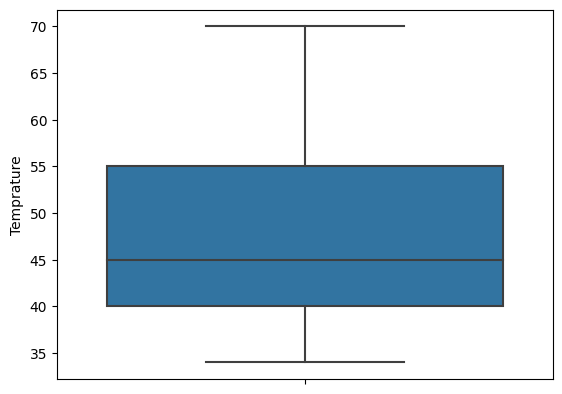

In [68]:
data2_low = data2[data2["Grade"] == 0]

import matplotlib.pyplot as plt
import seaborn

seaborn.boxplot(y = data2_low["Temprature"])
plt.show()

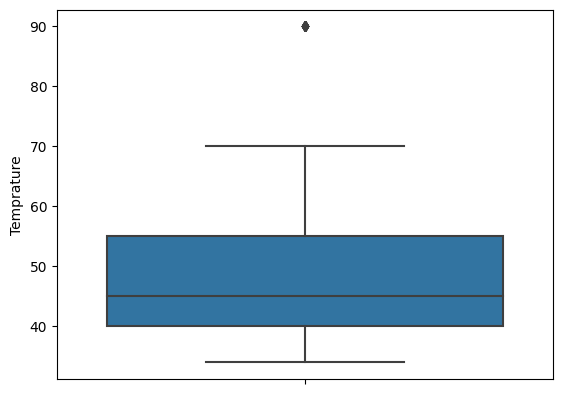

In [69]:
seaborn.boxplot(y = data_classification_list[2]["Temprature"])
plt.show()

In [70]:
data2.to_csv("data/modified_data.csv", index=False, encoding="utf-8")